1. Global Earthquakes

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")

equs = pd.read_csv(r"C:\\Users\\yuanwenting\\Documents\\ESE5023\\assignment\usgs_earthquakes.csv")
equs

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


Text(0.5, 1.0, 'Top 50 earthquakes of 2014')

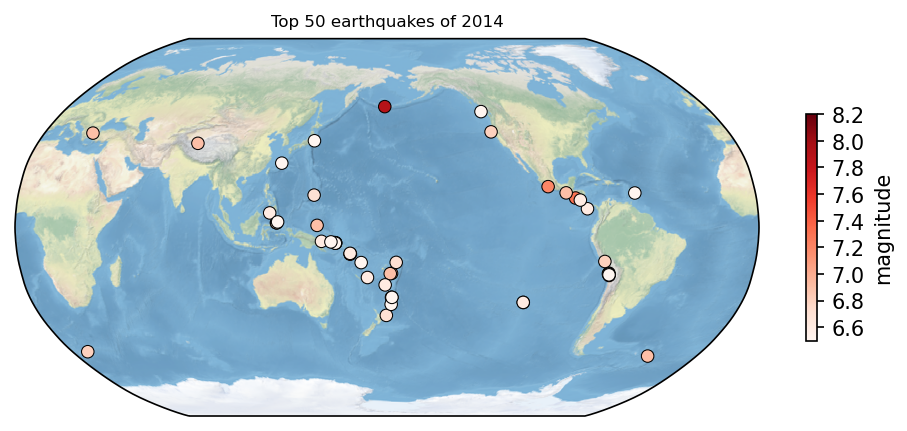

In [4]:
plt.figure(figsize=(8,5), dpi=150)
#中央经线设置参照：https://blog.csdn.net/qq_44955314/article/details/119933373
proj=ccrs.Robinson(central_longitude=180,globe=None) 
ax = plt.axes(projection=proj)

#绘制地球阴影浮雕图参照：https://www.cnblogs.com/youxiaogang/p/14262751.html
ax.stock_img()

#筛选mag前50次地震
equs_50=equs.sort_values("mag", ascending=False).head(50)

#画散点图。x、y、c分别为equs_50中'longitude'、'latitude'和'mag'列
plt.scatter('longitude', 'latitude',  c='mag', data=equs_50,
            cmap='Reds', edgecolors='black', linewidths=0.5,
            transform=ccrs.PlateCarree())

#colorbar刻度设置参照：https://blog.csdn.net/x_and_y/article/details/107370761
plt.colorbar(shrink=0.4,label='magnitude').ax.yaxis.set_major_locator(MultipleLocator(0.2))
plt.title('Top 50 earthquakes of 2014',fontsize=8)

2.Explore a netCDF dataset

In [5]:
#2.1
ds= xr.open_dataset("CESM2_200001-201412.nc", engine="netcdf4")
surface_T= ds.tas.isel(time=1)
surface_T

<xarray.DataArray 'tas' (lat: 192, lon: 288)>
array([[236.51689, 236.51689, 236.51689, ..., 236.51689, 236.51689, 236.51689],
       [236.9432 , 236.89592, 236.73224, ..., 236.99376, 236.97823, 236.96432],
       [237.28722, 237.2335 , 237.1985 , ..., 237.55449, 237.49416, 237.40793],
       ...,
       [241.329  , 241.3181 , 241.30516, ..., 241.35661, 241.34663, 241.33691],
       [241.3106 , 241.30481, 241.29861, ..., 241.32701, 241.32219, 241.31647],
       [241.32259, 241.32254, 241.32248, ..., 241.32278, 241.32271, 241.32265]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    time     object 2000-02-14 00:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    long_name:      Near-Surface Air Temperature
    mipTable:       Amon
    out_name:       tas
    prov:           Amon ((isd.003))
    realm:          atmos
    standard_name:  air_temperature
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

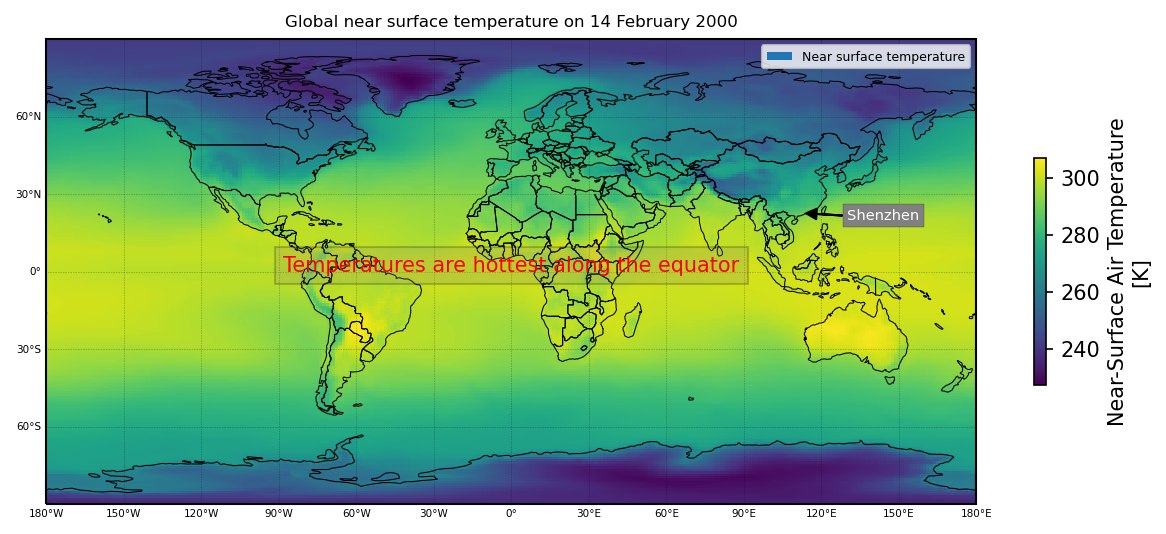

In [6]:
#2.1（续）
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

plt.figure(figsize=(10,5), dpi=150)
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

#画温度图，设置colorbar
surface_T.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.4})

#画国界线features
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

#设置网格线gridlines
gl=ax.gridlines(draw_labels=True,crs=ccrs.PlateCarree(),linestyle=":",linewidth=0.3,color='k',alpha=0.5)

#Cartopy经纬度添加参照：https://cloud.tencent.com/developer/article/1790266
gl.top_labels=False  #关闭上部/右侧经纬度标签                                  
gl.right_labels=False
gl.xformatter = LONGITUDE_FORMATTER  #使横纵坐标转化为经纬度格式            
gl.yformatter = LATITUDE_FORMATTER                                      
gl.xlocator=mticker.FixedLocator(np.arange(-180,181,30))  #设置横纵坐标范围及刻度    
gl.ylocator=mticker.FixedLocator(np.arange(-90,91,30))     
gl.xlabel_style={'size':5} #修改经纬度字体大小                             
gl.ylabel_style={'size':5}

#设置图像标题title
ax.set_title('Global near surface temperature on 14 February 2000',fontsize=8)
ax.spines['geo'].set_linewidth(1) #调节边框粗细

#设置注释annotate
ax.annotate('Shenzhen',xy=(114.06,22.54),xytext=(130,20),  # 深圳
            bbox=dict(boxstyle='square', fc='grey',linewidth=0.1),
            arrowprops=dict(facecolor='black', width=0.01,headwidth=5, headlength=5,shrink=0.005), 
            fontsize=7, color='white', horizontalalignment='left',
            transform=ccrs.PlateCarree())

#设置点标签text
plt.text(0, 0, 'Temperatures are hottest along the equator', size = 10,
         horizontalalignment='center', color='red',
         bbox=dict(facecolor="grey",alpha=0.2),
         transform=ccrs.PlateCarree())

#设置图列legend
plt.legend(['Near surface temperature'],loc='best',fontsize=6)

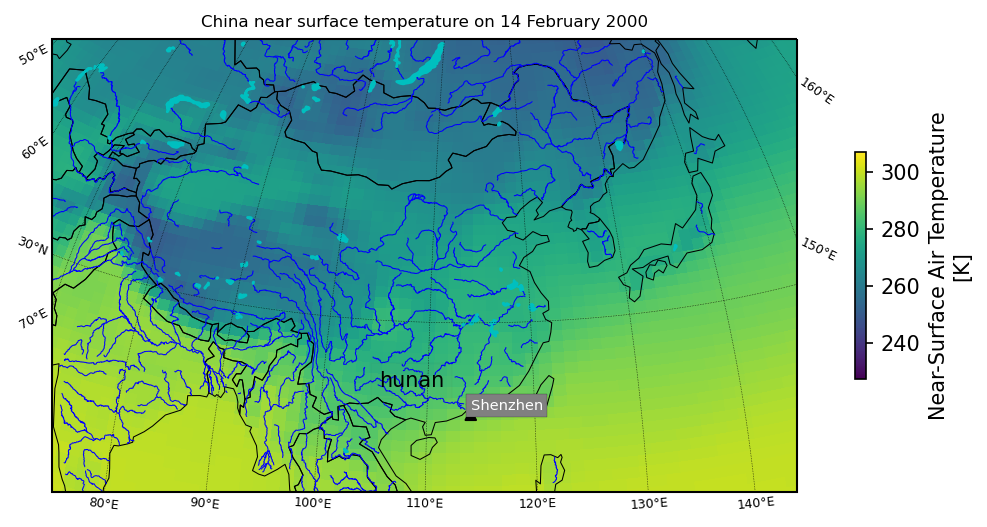

In [16]:
#2.2
plt.figure(figsize=(10,4), dpi=150)

#设置正投影样式
central_lon, central_lat = 114.06, 22.54  #深圳
proj = ccrs.Orthographic(central_lon, central_lat) 
ax = plt.axes(projection=proj)

#设置显示范围（114.06-40~114.06+30，22.54-10，22.54+30）
extent = [central_lon-40, central_lon+30, central_lat-10, central_lat+30]
ax.set_extent(extent)

#画温度图，设置colorbar
surface_T.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.5})

#画国界线features
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
#设置注释annotate
ax.annotate('Shenzhen',xy=(114.06,22.54),xytext=(120,20),  # 深圳
            bbox=dict(boxstyle='square', fc='grey',linewidth=0.1),
            arrowprops=dict(facecolor='black', width=0.01,headwidth=5, headlength=5,shrink=0.005), 
            fontsize=7, color='white', horizontalalignment='left',
            transform=ccrs.PlateCarree())

#设置点标签text
ax.text(108.47,24.38, 'hunan', size = 10,
         horizontalalignment='center', color='k',
         bbox=dict(facecolor="red",alpha=0.01),
         transform=ccrs.PlateCarree())

#加河流、湖泊的features
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')
ax.add_feature(cfeature.LAKES, edgecolor='c', facecolor='c', zorder=2)
ax.add_feature(rivers_10m, facecolor='None', edgecolor='b', linewidth=0.5)

#设置网格线gridlines
gl=ax.gridlines(draw_labels=True,crs=ccrs.PlateCarree(),linestyle=":",linewidth=0.3,color='k',alpha=1)

#设置Cartopy经纬度（x、y轴）
gl.top_labels=False  #关闭上部/右侧经纬度标签                                  
gl.right_labels=False
gl.xformatter = LONGITUDE_FORMATTER  #使横纵坐标转化为经纬度格式            
gl.yformatter = LATITUDE_FORMATTER                                      
gl.xlocator=mticker.FixedLocator(np.arange(-180,181,10))  #设置横纵坐标范围及刻度    
gl.ylocator=mticker.FixedLocator(np.arange(-90,91,30))     
gl.xlabel_style={'size':6} #修改经纬度字体大小                             
gl.ylabel_style={'size':6}

#设置图像标题title
ax.set_title('China near surface temperature on 14 February 2000',fontsize=8)
ax.spines['geo'].set_linewidth(1) #调节边框粗细